Exemple de données : [[ 0  0 -1  0 -1  0 -1  0  0]
 [ 0  0  0 -1 -1 -1  0  0  0]
 [ 1  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  1]
 [ 0  0  0  1  1  1  0  0  0]]
Exemple de labels : [1 1 1 1 1]
RandomForest Accuracy: 1.00
SVM Accuracy: 0.64


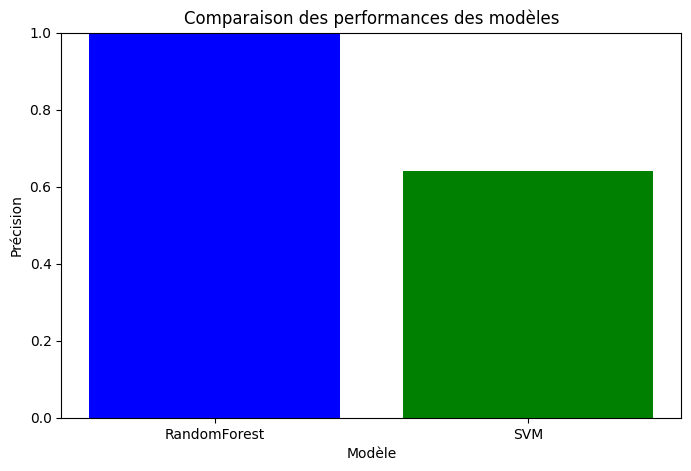

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import ast

def load_dataset(csv_file):
    """Charge le dataset depuis un fichier CSV."""
    data = []
    labels = []
    with open(csv_file, 'r') as f:
        reader = csv.reader(f)
        next(reader)  # Ignorer l'en-tête
        for row in reader:
            labels.append(int(row[0]))  # La première colonne est le label
            # Safely evaluate the string representation of the board
            board = ast.literal_eval(row[1])
            # Flatten the board into a 1D array
            board = [item for sublist in board for item in sublist]
            data.append(board)
    return np.array(data), np.array(labels)

# Charger le dataset
file_path = "fanorona_dataset.csv"  # Assurez-vous que ce fichier est bien dans le même dossier
data, labels = load_dataset(file_path)

# Vérification rapide des données
print("Exemple de données :", data[:5])
print("Exemple de labels :", labels[:5])

# Division des données
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Modèle RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Modèle SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

print(f"RandomForest Accuracy: {rf_accuracy:.2f}")
print(f"SVM Accuracy: {svm_accuracy:.2f}")

# Visualisation des performances
models = ["RandomForest", "SVM"]
accuracies = [rf_accuracy, svm_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylim(0, 1)
plt.xlabel("Modèle")
plt.ylabel("Précision")
plt.title("Comparaison des performances des modèles")
plt.show()
